In [1]:
import numpy as np
import pandas as pd
import glob, matplotlib, os, math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import matplotlib.backends.backend_pdf as pdf
import scipy.stats

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

%matplotlib inline
plt.style.use('./gcamp_figures/figures.mplstyle')

In [2]:
'''
Plotting data from EXPERIMENT trials: read in data for each measurement.
'''

odor = '1-octen-3-ol_100um'
df = pd.read_csv('./individual_larva_calculations_GCAMP.csv')
df = df[df['dead']== False]

# DATA FOR ORCO ANIMALS
temp = df[(df['treatment_odor'] == 'milliQ_water_100uL') & (df['background'] == 'orco5_gcamp')]
water_orco_E_PI = temp['E_PI_(L-R)'].tolist()

temp = df[(df['treatment_odor'] == 'filtered_food_odor_100uL') & (df['background'] == 'orco5_gcamp')]
food_orco_E_PI = temp['E_PI_(L-R)'].tolist()

temp = df[(df['treatment_odor'] == odor) & (df['background'] == 'orco5_gcamp')]
odor_orco_E_PI = temp['E_PI_(L-R)'].tolist()

# DATA FOR GR3 ANIMALS
temp = df[(df['treatment_odor'] == 'milliQ_water_100uL') & (df['background'] == 'gr3_gcamp')]
water_gr3_E_PI = temp['E_PI_(L-R)'].tolist()

temp = df[(df['treatment_odor'] == 'filtered_food_odor_100uL') & (df['background'] == 'gr3_gcamp')]
food_gr3_E_PI = temp['E_PI_(L-R)'].tolist()

temp = df[(df['treatment_odor'] == odor) & (df['background'] == 'gr3_gcamp')]
odor_gr3_E_PI = temp['E_PI_(L-R)'].tolist()
 
# DATA FOR GCAMP ANIMALS
temp = df[(df['treatment_odor'] == 'milliQ_water_100uL') & (df['background'] == 'gcamp')]
water_gcamp_E_PI = temp['E_PI_(L-R)'].tolist()
 
temp = df[(df['treatment_odor'] == 'filtered_food_odor_100uL') & (df['background'] == 'gcamp')]
food_gcamp_E_PI = temp['E_PI_(L-R)'].tolist()
 
temp = df[(df['treatment_odor'] == odor) & (df['background'] == 'gcamp')]
odor_gcamp_E_PI = temp['E_PI_(L-R)'].tolist()
 
# DATA FOR WT ANIMALS
temp = df[(df['treatment_odor'] == 'milliQ_water_100uL') & (df['background'] == 'wt')]
water_wt_E_PI = temp['E_PI_(L-R)'].tolist()
 
# PRINT NS OF TREATMENTS
print('odor gcamp n=', len(odor_gcamp_E_PI))
print('odor orco n=', len(odor_orco_E_PI))
print('odor gr3 n=', len(odor_gr3_E_PI))
print('food gcamp n=', len(food_gcamp_E_PI))
print('food orco n=', len(food_orco_E_PI))
print('food gr3 n=', len(food_gr3_E_PI))
print('water gcamp n=', len(water_gcamp_E_PI))
print('water orco n=', len(water_orco_E_PI))
print('water gr3 n=', len(water_gr3_E_PI))
print('water wt n=', len(water_wt_E_PI))

odor gcamp n= 14
odor orco n= 16
odor gr3 n= 17
food gcamp n= 20
food orco n= 20
food gr3 n= 16
water gcamp n= 20
water orco n= 24
water gr3 n= 16
water wt n= 19


In [3]:
'''
Declare design variables that are the same for each plot
'''

labels = ['Water','Food','1-octen-3-ol'] * 3 # doubled for acclimate // experiment 
labels = labels + ['Water'] # add WT animals treatment

color1 = '#c1c1c1' # acclimate
color2 = '#4286f4' # experiment
color3 = '#666666' # dark acclimate
color4 = '#1f5dc1' # dark experiment

w = 2 # line weight for mean line on plots
width = 0.5 # width of the data rectangles
pgap = 0.05 # space between data and significance notation (* / NS)

def add_square(sub, position, val, text=None, pgap=pgap):
    ''' Add rectangle to graph with mean and SE for the given dataset '''
    mean = np.mean(val)
    se = scipy.stats.sem(val, nan_policy='omit')
    sub.add_patch(pch.Rectangle((position-width/2, mean-se), width, se*2, fc=color1, ec='none'))
    sub.plot([position-width/2, position+width/2], [mean, mean], color=color3, lw=w)
    if text is not None:
        sub.text(s=text, x=position, y=mean+se+pgap, ha='center', va='center')

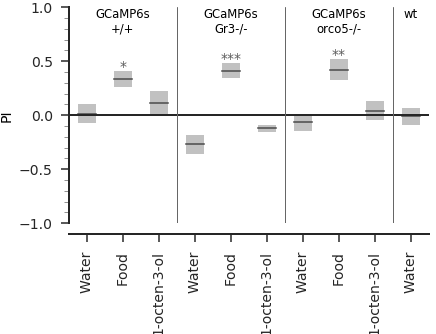

In [4]:
fig= plt.figure(figsize=(10, 6))
sub1 = fig.add_subplot(111)

sub1.set_ylabel('PI', color='k')
sub1.set_ylim(-1, 1)

# Add data for each treatment group, as well as the significance
add_square(sub1, 1,  water_gcamp_E_PI)
add_square(sub1, 2,  food_gcamp_E_PI, '*')
add_square(sub1, 3,  odor_gcamp_E_PI)

add_square(sub1, 4,  water_gr3_E_PI)
add_square(sub1, 5,  food_gr3_E_PI, '***')
add_square(sub1, 6,  odor_gr3_E_PI)

add_square(sub1, 7,  water_orco_E_PI)
add_square(sub1, 8,  food_orco_E_PI, '**')
add_square(sub1, 9,  odor_orco_E_PI)

add_square(sub1, 10, water_wt_E_PI)

sub1.spines['bottom'].set_position(('axes', -0.05))
sub1.tick_params(axis='x', which='minor', bottom='off')
sub1.set_xlim(0.5, 10.5)
sub1.set_xticklabels(labels, rotation=90)
sub1.set_xticks(np.arange(1, len(labels)+1, 1))
sub1.axhline(y=0, xmin=-1, xmax=11, lw=2)

# add vertical lines and text eperating the genetic lines
ymin, ymax = sub1.get_ylim()
for x in [3.5, 6.5, 9.5]:
    sub1.axvline(x=x, ymin=-1, ymax=1, lw=1, ls='solid', color=color3)

loc = 1 # position of the text (1 = top of the plot, 0 = bottom of the plot)
sub1.text(2, loc, 'GCaMP6s\n+/+', ha='center', va='top', size='smaller', color='k')
sub1.text(5, loc, 'GCaMP6s\nGr3-/-', ha='center', va='top', size='smaller', color='k')
sub1.text(8, loc, 'GCaMP6s\norco5-/-', ha='center', va='top', size='smaller', color='k')
sub1.text(10, loc, 'wt', ha='center', va='top', size='smaller', color='k')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)
pp = pdf.PdfPages('./gcamp_figures/Figure_4_graphs.pdf')
pp.savefig(fig)
pp.close()

plt.show()
plt.clf()
plt.close('all')

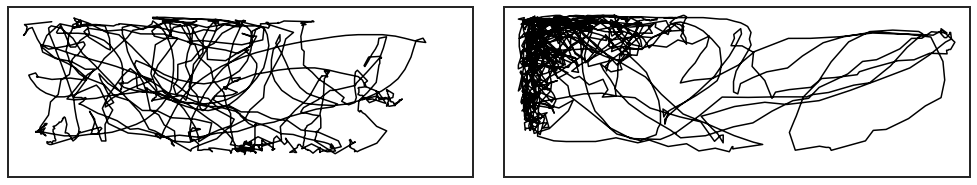

In [5]:
# Show trajectories during the acclimate and experiment phases for one animal

# ID of the animal with the trajectory to show
animal_ID = '171019-01-bottom' # GCaMP6s/orco5-/- larvae, food stimulus

acclimate_fname = './gcamp_video_calculations/' + animal_ID + '-acclimate.csv'
experiment_fname = './gcamp_video_calculations/' + animal_ID + '-experiment.csv'

fig = plt.figure(figsize=(14, 3))

sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)

a_df = pd.read_csv(acclimate_fname)
e_df = pd.read_csv(experiment_fname)

sub1.plot(a_df['zeroed_x_mm'], a_df['zeroed_y_mm'], lw=1.5, color='k')
sub2.plot(e_df['zeroed_x_mm'], e_df['zeroed_y_mm'] , lw=1.5, color='k')

for ax in [sub1, sub2]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 80)
    ax.set_ylim(0, 30)
    
    # reverse y axis direction to match image array indices used when tracking
    # 0 should start at the top of the plot to match image matrix
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    
plt.tight_layout()
plt.show()
plt.clf()
plt.close('all')

pp = pdf.PdfPages('./gcamp_figures/Figure_4_trajectory.pdf')
pp.savefig(fig)
pp.close()